In [1]:
import pandas as pd
from scipy.io import arff
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#to load .arff 
dataSet = arff.loadarff('bone-marrow.arff')

In [3]:
dataFrame = pd.DataFrame(dataSet[0])

In [4]:
df = dataFrame.copy()

In [5]:
df.head(7)

,donor_age,donor_age_below_35,donor_ABO,donor_CMV,recipient_age,recipient_age_below_10,recipient_age_int,recipient_gender,recipient_body_mass,recipient_ABO,...,CD3_to_CD34_ratio,ANC_recovery,PLT_recovery,acute_GvHD_II_III_IV,acute_GvHD_III_IV,time_to_acute_GvHD_III_IV,extensive_chronic_GvHD,relapse,survival_time,survival_status
0,22.830137,b'yes',b'A',b'present',9.6,b'yes',b'5_10',b'male',35.0,b'A',...,1.338760,19.0,51.0,b'yes',b'yes',32.0,b'no',b'no',999.0,b'0'
1,23.342466,b'yes',b'B',b'absent',4.0,b'yes',b'0_5',b'male',20.6,b'B',...,11.078295,16.0,37.0,b'yes',b'no',1000000.0,b'no',b'yes',163.0,b'1'
2,26.394521,b'yes',b'B',b'absent',6.6,b'yes',b'5_10',b'male',23.4,b'B',...,19.013230,23.0,20.0,b'yes',b'no',1000000.0,b'no',b'yes',435.0,b'1'
3,39.684932,b'no',b'A',b'present',18.1,b'no',b'10_20',b'female',50.0,b'AB',...,29.481647,23.0,29.0,b'yes',b'yes',19.0,b'?',b'no',53.0,b'1'
4,33.358904,b'yes',b'A',b'absent',1.3,b'yes',b'0_5',b'female',9.0,b'AB',...,3.972255,14.0,14.0,b'no',b'no',1000000.0,b'no',b'no',2043.0,b'0'
5,27.391781,b'yes',b'AB',b'?',8.9,b'yes',b'5_10',b'male',40.0,b'0',...,8.412758,16.0,70.0,b'no',b'no',1000000.0,b'no',b'no',2800.0,b'0'
6,34.520548,b'yes',b'0',b'absent',14.4,b'no',b'10_20',b'female',51.0,b'A',...,2.406248,17.0,29.0,b'yes',b'yes',18.0,b'?',b'no',41.0,b'1'


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   donor_age                  187 non-null    float64
 1   donor_age_below_35         187 non-null    object 
 2   donor_ABO                  187 non-null    object 
 3   donor_CMV                  187 non-null    object 
 4   recipient_age              187 non-null    float64
 5   recipient_age_below_10     187 non-null    object 
 6   recipient_age_int          187 non-null    object 
 7   recipient_gender           187 non-null    object 
 8   recipient_body_mass        185 non-null    float64
 9   recipient_ABO              187 non-null    object 
 10  recipient_rh               187 non-null    object 
 11  recipient_CMV              187 non-null    object 
 12  disease                    187 non-null    object 
 13  disease_group              187 non-null    object 

In [7]:
# Filling Null values using Imputation (mean) method

df['recipient_body_mass'].fillna(value = df['recipient_body_mass'].mean(), inplace = True)
df['CD3_x1e8_per_kg'].fillna(value = df['CD3_x1e8_per_kg'].mean(), inplace = True)
df['CD3_to_CD34_ratio'].fillna(value = df['CD3_to_CD34_ratio'].mean(), inplace = True)

In [8]:
# Re-check for Null values

df.isna().any()

donor_age                    False
donor_age_below_35           False
donor_ABO                    False
donor_CMV                    False
recipient_age                False
recipient_age_below_10       False
recipient_age_int            False
recipient_gender             False
recipient_body_mass          False
recipient_ABO                False
recipient_rh                 False
recipient_CMV                False
disease                      False
disease_group                False
gender_match                 False
ABO_match                    False
CMV_status                   False
HLA_match                    False
HLA_mismatch                 False
antigen                      False
allel                        False
HLA_group_1                  False
risk_group                   False
stem_cell_source             False
tx_post_relapse              False
CD34_x1e6_per_kg             False
CD3_x1e8_per_kg              False
CD3_to_CD34_ratio            False
ANC_recovery        

In [9]:
##Start handling categorical data

df.donor_age_below_35.unique()
df.donor_age_below_35.value_counts()

b'yes'    104
b'no'      83
Name: donor_age_below_35, dtype: int64

In [10]:
#one-Hot encoder 
dummy = pd.get_dummies(df.donor_age_below_35, prefix = 'donorAge_below35')
dummy.head()

,donorAge_below35_b'no',donorAge_below35_b'yes'
0,0,1
1,0,1
2,0,1
3,1,0
4,0,1


In [11]:
df = pd.concat([df, dummy], axis = 1)
df.head(7)

,donor_age,donor_age_below_35,donor_ABO,donor_CMV,recipient_age,recipient_age_below_10,recipient_age_int,recipient_gender,recipient_body_mass,recipient_ABO,...,PLT_recovery,acute_GvHD_II_III_IV,acute_GvHD_III_IV,time_to_acute_GvHD_III_IV,extensive_chronic_GvHD,relapse,survival_time,survival_status,donorAge_below35_b'no',donorAge_below35_b'yes'
0,22.830137,b'yes',b'A',b'present',9.6,b'yes',b'5_10',b'male',35.0,b'A',...,51.0,b'yes',b'yes',32.0,b'no',b'no',999.0,b'0',0,1
1,23.342466,b'yes',b'B',b'absent',4.0,b'yes',b'0_5',b'male',20.6,b'B',...,37.0,b'yes',b'no',1000000.0,b'no',b'yes',163.0,b'1',0,1
2,26.394521,b'yes',b'B',b'absent',6.6,b'yes',b'5_10',b'male',23.4,b'B',...,20.0,b'yes',b'no',1000000.0,b'no',b'yes',435.0,b'1',0,1
3,39.684932,b'no',b'A',b'present',18.1,b'no',b'10_20',b'female',50.0,b'AB',...,29.0,b'yes',b'yes',19.0,b'?',b'no',53.0,b'1',1,0
4,33.358904,b'yes',b'A',b'absent',1.3,b'yes',b'0_5',b'female',9.0,b'AB',...,14.0,b'no',b'no',1000000.0,b'no',b'no',2043.0,b'0',0,1
5,27.391781,b'yes',b'AB',b'?',8.9,b'yes',b'5_10',b'male',40.0,b'0',...,70.0,b'no',b'no',1000000.0,b'no',b'no',2800.0,b'0',0,1
6,34.520548,b'yes',b'0',b'absent',14.4,b'no',b'10_20',b'female',51.0,b'A',...,29.0,b'yes',b'yes',18.0,b'?',b'no',41.0,b'1',0,1


In [12]:
df = df.drop(['donor_age_below_35'], axis = 1)
df.head()

,donor_age,donor_ABO,donor_CMV,recipient_age,recipient_age_below_10,recipient_age_int,recipient_gender,recipient_body_mass,recipient_ABO,recipient_rh,...,PLT_recovery,acute_GvHD_II_III_IV,acute_GvHD_III_IV,time_to_acute_GvHD_III_IV,extensive_chronic_GvHD,relapse,survival_time,survival_status,donorAge_below35_b'no',donorAge_below35_b'yes'
0,22.830137,b'A',b'present',9.6,b'yes',b'5_10',b'male',35.0,b'A',b'plus',...,51.0,b'yes',b'yes',32.0,b'no',b'no',999.0,b'0',0,1
1,23.342466,b'B',b'absent',4.0,b'yes',b'0_5',b'male',20.6,b'B',b'plus',...,37.0,b'yes',b'no',1000000.0,b'no',b'yes',163.0,b'1',0,1
2,26.394521,b'B',b'absent',6.6,b'yes',b'5_10',b'male',23.4,b'B',b'plus',...,20.0,b'yes',b'no',1000000.0,b'no',b'yes',435.0,b'1',0,1
3,39.684932,b'A',b'present',18.1,b'no',b'10_20',b'female',50.0,b'AB',b'plus',...,29.0,b'yes',b'yes',19.0,b'?',b'no',53.0,b'1',1,0
4,33.358904,b'A',b'absent',1.3,b'yes',b'0_5',b'female',9.0,b'AB',b'minus',...,14.0,b'no',b'no',1000000.0,b'no',b'no',2043.0,b'0',0,1


In [13]:
df.columns= ['donor_age', 'donor_ABO', 'donor_CMV', 'recipient_age',
       'recipient_age_below_10', 'recipient_age_int', 'recipient_gender',
       'recipient_body_mass', 'recipient_ABO', 'recipient_rh', 'recipient_CMV',
       'disease', 'disease_group', 'gender_match', 'ABO_match', 'CMV_status',
       'HLA_match', 'HLA_mismatch', 'antigen', 'allel', 'HLA_group_1',
       'risk_group', 'stem_cell_source', 'tx_post_relapse', 'CD34_x1e6_per_kg',
       'CD3_x1e8_per_kg', 'CD3_to_CD34_ratio', 'ANC_recovery', 'PLT_recovery',
       'acute_GvHD_II_III_IV', 'acute_GvHD_III_IV',
       'time_to_acute_GvHD_III_IV', 'extensive_chronic_GvHD', 'relapse',
       'survival_time', 'survival_status', 'donorAge_below35_not',
       'donorAge_below35_yes']

In [14]:
df.head()

,donor_age,donor_ABO,donor_CMV,recipient_age,recipient_age_below_10,recipient_age_int,recipient_gender,recipient_body_mass,recipient_ABO,recipient_rh,...,PLT_recovery,acute_GvHD_II_III_IV,acute_GvHD_III_IV,time_to_acute_GvHD_III_IV,extensive_chronic_GvHD,relapse,survival_time,survival_status,donorAge_below35_not,donorAge_below35_yes
0,22.830137,b'A',b'present',9.6,b'yes',b'5_10',b'male',35.0,b'A',b'plus',...,51.0,b'yes',b'yes',32.0,b'no',b'no',999.0,b'0',0,1
1,23.342466,b'B',b'absent',4.0,b'yes',b'0_5',b'male',20.6,b'B',b'plus',...,37.0,b'yes',b'no',1000000.0,b'no',b'yes',163.0,b'1',0,1
2,26.394521,b'B',b'absent',6.6,b'yes',b'5_10',b'male',23.4,b'B',b'plus',...,20.0,b'yes',b'no',1000000.0,b'no',b'yes',435.0,b'1',0,1
3,39.684932,b'A',b'present',18.1,b'no',b'10_20',b'female',50.0,b'AB',b'plus',...,29.0,b'yes',b'yes',19.0,b'?',b'no',53.0,b'1',1,0
4,33.358904,b'A',b'absent',1.3,b'yes',b'0_5',b'female',9.0,b'AB',b'minus',...,14.0,b'no',b'no',1000000.0,b'no',b'no',2043.0,b'0',0,1


In [15]:
df = df.drop(['donorAge_below35_not'], axis =1)
df.head()

,donor_age,donor_ABO,donor_CMV,recipient_age,recipient_age_below_10,recipient_age_int,recipient_gender,recipient_body_mass,recipient_ABO,recipient_rh,...,ANC_recovery,PLT_recovery,acute_GvHD_II_III_IV,acute_GvHD_III_IV,time_to_acute_GvHD_III_IV,extensive_chronic_GvHD,relapse,survival_time,survival_status,donorAge_below35_yes
0,22.830137,b'A',b'present',9.6,b'yes',b'5_10',b'male',35.0,b'A',b'plus',...,19.0,51.0,b'yes',b'yes',32.0,b'no',b'no',999.0,b'0',1
1,23.342466,b'B',b'absent',4.0,b'yes',b'0_5',b'male',20.6,b'B',b'plus',...,16.0,37.0,b'yes',b'no',1000000.0,b'no',b'yes',163.0,b'1',1
2,26.394521,b'B',b'absent',6.6,b'yes',b'5_10',b'male',23.4,b'B',b'plus',...,23.0,20.0,b'yes',b'no',1000000.0,b'no',b'yes',435.0,b'1',1
3,39.684932,b'A',b'present',18.1,b'no',b'10_20',b'female',50.0,b'AB',b'plus',...,23.0,29.0,b'yes',b'yes',19.0,b'?',b'no',53.0,b'1',0
4,33.358904,b'A',b'absent',1.3,b'yes',b'0_5',b'female',9.0,b'AB',b'minus',...,14.0,14.0,b'no',b'no',1000000.0,b'no',b'no',2043.0,b'0',1


In [16]:
df.donor_CMV.value_counts()

b'absent'     113
b'present'     72
b'?'            2
Name: donor_CMV, dtype: int64

In [17]:
df.donor_CMV = df.donor_CMV.replace(b'?', b'absent')
df.donor_CMV.unique()

array([b'present', b'absent'], dtype=object)

In [18]:
dummy = pd.get_dummies(df.donor_CMV, prefix = 'donorCMV')
dummy.head()

,donorCMV_b'absent',donorCMV_b'present'
0,0,1
1,1,0
2,1,0
3,0,1
4,1,0


In [19]:
df = pd.concat([df, dummy], axis =1)
df.head()

,donor_age,donor_ABO,donor_CMV,recipient_age,recipient_age_below_10,recipient_age_int,recipient_gender,recipient_body_mass,recipient_ABO,recipient_rh,...,acute_GvHD_II_III_IV,acute_GvHD_III_IV,time_to_acute_GvHD_III_IV,extensive_chronic_GvHD,relapse,survival_time,survival_status,donorAge_below35_yes,donorCMV_b'absent',donorCMV_b'present'
0,22.830137,b'A',b'present',9.6,b'yes',b'5_10',b'male',35.0,b'A',b'plus',...,b'yes',b'yes',32.0,b'no',b'no',999.0,b'0',1,0,1
1,23.342466,b'B',b'absent',4.0,b'yes',b'0_5',b'male',20.6,b'B',b'plus',...,b'yes',b'no',1000000.0,b'no',b'yes',163.0,b'1',1,1,0
2,26.394521,b'B',b'absent',6.6,b'yes',b'5_10',b'male',23.4,b'B',b'plus',...,b'yes',b'no',1000000.0,b'no',b'yes',435.0,b'1',1,1,0
3,39.684932,b'A',b'present',18.1,b'no',b'10_20',b'female',50.0,b'AB',b'plus',...,b'yes',b'yes',19.0,b'?',b'no',53.0,b'1',0,0,1
4,33.358904,b'A',b'absent',1.3,b'yes',b'0_5',b'female',9.0,b'AB',b'minus',...,b'no',b'no',1000000.0,b'no',b'no',2043.0,b'0',1,1,0


In [20]:
df = df.drop(['donor_CMV'], axis=1)
df.head()

,donor_age,donor_ABO,recipient_age,recipient_age_below_10,recipient_age_int,recipient_gender,recipient_body_mass,recipient_ABO,recipient_rh,recipient_CMV,...,acute_GvHD_II_III_IV,acute_GvHD_III_IV,time_to_acute_GvHD_III_IV,extensive_chronic_GvHD,relapse,survival_time,survival_status,donorAge_below35_yes,donorCMV_b'absent',donorCMV_b'present'
0,22.830137,b'A',9.6,b'yes',b'5_10',b'male',35.0,b'A',b'plus',b'present',...,b'yes',b'yes',32.0,b'no',b'no',999.0,b'0',1,0,1
1,23.342466,b'B',4.0,b'yes',b'0_5',b'male',20.6,b'B',b'plus',b'absent',...,b'yes',b'no',1000000.0,b'no',b'yes',163.0,b'1',1,1,0
2,26.394521,b'B',6.6,b'yes',b'5_10',b'male',23.4,b'B',b'plus',b'present',...,b'yes',b'no',1000000.0,b'no',b'yes',435.0,b'1',1,1,0
3,39.684932,b'A',18.1,b'no',b'10_20',b'female',50.0,b'AB',b'plus',b'absent',...,b'yes',b'yes',19.0,b'?',b'no',53.0,b'1',0,0,1
4,33.358904,b'A',1.3,b'yes',b'0_5',b'female',9.0,b'AB',b'minus',b'present',...,b'no',b'no',1000000.0,b'no',b'no',2043.0,b'0',1,1,0


In [21]:
dummy = pd.get_dummies(df.recipient_age_below_10, prefix = 'recipientAge_below10')
dummy.head()

,recipientAge_below10_b'no',recipientAge_below10_b'yes'
0,0,1
1,0,1
2,0,1
3,1,0
4,0,1


In [22]:
df = pd.concat([df, dummy], axis =1)
df.head()

,donor_age,donor_ABO,recipient_age,recipient_age_below_10,recipient_age_int,recipient_gender,recipient_body_mass,recipient_ABO,recipient_rh,recipient_CMV,...,time_to_acute_GvHD_III_IV,extensive_chronic_GvHD,relapse,survival_time,survival_status,donorAge_below35_yes,donorCMV_b'absent',donorCMV_b'present',recipientAge_below10_b'no',recipientAge_below10_b'yes'
0,22.830137,b'A',9.6,b'yes',b'5_10',b'male',35.0,b'A',b'plus',b'present',...,32.0,b'no',b'no',999.0,b'0',1,0,1,0,1
1,23.342466,b'B',4.0,b'yes',b'0_5',b'male',20.6,b'B',b'plus',b'absent',...,1000000.0,b'no',b'yes',163.0,b'1',1,1,0,0,1
2,26.394521,b'B',6.6,b'yes',b'5_10',b'male',23.4,b'B',b'plus',b'present',...,1000000.0,b'no',b'yes',435.0,b'1',1,1,0,0,1
3,39.684932,b'A',18.1,b'no',b'10_20',b'female',50.0,b'AB',b'plus',b'absent',...,19.0,b'?',b'no',53.0,b'1',0,0,1,1,0
4,33.358904,b'A',1.3,b'yes',b'0_5',b'female',9.0,b'AB',b'minus',b'present',...,1000000.0,b'no',b'no',2043.0,b'0',1,1,0,0,1


In [23]:
df.recipient_age_below_10.value_counts()

b'yes'    99
b'no'     88
Name: recipient_age_below_10, dtype: int64

In [24]:
df.columns=['donor_age', 'donor_ABO', 'recipient_age', 'recipient_age_below_10',
       'recipient_age_int', 'recipient_gender', 'recipient_body_mass',
       'recipient_ABO', 'recipient_rh', 'recipient_CMV', 'disease',
       'disease_group', 'gender_match', 'ABO_match', 'CMV_status', 'HLA_match',
       'HLA_mismatch', 'antigen', 'allel', 'HLA_group_1', 'risk_group',
       'stem_cell_source', 'tx_post_relapse', 'CD34_x1e6_per_kg',
       'CD3_x1e8_per_kg', 'CD3_to_CD34_ratio', 'ANC_recovery', 'PLT_recovery',
       'acute_GvHD_II_III_IV', 'acute_GvHD_III_IV',
       'time_to_acute_GvHD_III_IV', 'extensive_chronic_GvHD', 'relapse',
       'survival_time', 'survival_status', 'donorAge_below35_yes',
       'donorCMV_absent', 'donorCMV_present',
       'recipientAge_below10_no', 'recipientAge_below10_yes']

In [25]:
df = df.drop(['recipient_age_below_10'], axis =1)
df = df.drop(['recipientAge_below10_no'], axis =1)
df = df.drop(['donorCMV_present'], axis =1)
df.head(10)

,donor_age,donor_ABO,recipient_age,recipient_age_int,recipient_gender,recipient_body_mass,recipient_ABO,recipient_rh,recipient_CMV,disease,...,acute_GvHD_II_III_IV,acute_GvHD_III_IV,time_to_acute_GvHD_III_IV,extensive_chronic_GvHD,relapse,survival_time,survival_status,donorAge_below35_yes,donorCMV_absent,recipientAge_below10_yes
0,22.830137,b'A',9.6,b'5_10',b'male',35.0,b'A',b'plus',b'present',b'ALL',...,b'yes',b'yes',32.0,b'no',b'no',999.0,b'0',1,0,1
1,23.342466,b'B',4.0,b'0_5',b'male',20.6,b'B',b'plus',b'absent',b'ALL',...,b'yes',b'no',1000000.0,b'no',b'yes',163.0,b'1',1,1,1
2,26.394521,b'B',6.6,b'5_10',b'male',23.4,b'B',b'plus',b'present',b'ALL',...,b'yes',b'no',1000000.0,b'no',b'yes',435.0,b'1',1,1,1
3,39.684932,b'A',18.1,b'10_20',b'female',50.0,b'AB',b'plus',b'absent',b'AML',...,b'yes',b'yes',19.0,b'?',b'no',53.0,b'1',0,0,0
4,33.358904,b'A',1.3,b'0_5',b'female',9.0,b'AB',b'minus',b'present',b'chronic',...,b'no',b'no',1000000.0,b'no',b'no',2043.0,b'0',1,1,1
5,27.391781,b'AB',8.9,b'5_10',b'male',40.0,b'0',b'plus',b'present',b'chronic',...,b'no',b'no',1000000.0,b'no',b'no',2800.0,b'0',1,1,1
6,34.520548,b'0',14.4,b'10_20',b'female',51.0,b'A',b'minus',b'?',b'AML',...,b'yes',b'yes',18.0,b'?',b'no',41.0,b'1',1,1,0
7,21.435616,b'0',18.2,b'10_20',b'male',56.0,b'A',b'plus',b'absent',b'nonmalignant',...,b'yes',b'yes',22.0,b'?',b'no',45.0,b'1',1,0,0
8,32.641096,b'AB',7.9,b'5_10',b'male',20.5,b'0',b'plus',b'present',b'nonmalignant',...,b'no',b'no',1000000.0,b'no',b'no',671.0,b'0',1,1,1
9,28.783562,b'A',4.7,b'0_5',b'male',16.5,b'0',b'plus',b'present',b'nonmalignant',...,b'yes',b'no',1000000.0,b'no',b'no',676.0,b'0',1,1,1


In [26]:
dummy = pd.get_dummies(df.recipient_gender, prefix = 'recipientGender')
dummy.head()

,recipientGender_b'female',recipientGender_b'male'
0,0,1
1,0,1
2,0,1
3,1,0
4,1,0


In [27]:
df = pd.concat([df, dummy], axis =1)
df.head()

,donor_age,donor_ABO,recipient_age,recipient_age_int,recipient_gender,recipient_body_mass,recipient_ABO,recipient_rh,recipient_CMV,disease,...,time_to_acute_GvHD_III_IV,extensive_chronic_GvHD,relapse,survival_time,survival_status,donorAge_below35_yes,donorCMV_absent,recipientAge_below10_yes,recipientGender_b'female',recipientGender_b'male'
0,22.830137,b'A',9.6,b'5_10',b'male',35.0,b'A',b'plus',b'present',b'ALL',...,32.0,b'no',b'no',999.0,b'0',1,0,1,0,1
1,23.342466,b'B',4.0,b'0_5',b'male',20.6,b'B',b'plus',b'absent',b'ALL',...,1000000.0,b'no',b'yes',163.0,b'1',1,1,1,0,1
2,26.394521,b'B',6.6,b'5_10',b'male',23.4,b'B',b'plus',b'present',b'ALL',...,1000000.0,b'no',b'yes',435.0,b'1',1,1,1,0,1
3,39.684932,b'A',18.1,b'10_20',b'female',50.0,b'AB',b'plus',b'absent',b'AML',...,19.0,b'?',b'no',53.0,b'1',0,0,0,1,0
4,33.358904,b'A',1.3,b'0_5',b'female',9.0,b'AB',b'minus',b'present',b'chronic',...,1000000.0,b'no',b'no',2043.0,b'0',1,1,1,1,0


In [28]:
df.recipient_gender.value_counts()

b'male'      112
b'female'     75
Name: recipient_gender, dtype: int64

In [29]:
df.columns = ['donor_age', 'donor_ABO', 'recipient_age', 'recipient_age_int',
       'recipient_gender', 'recipient_body_mass', 'recipient_ABO',
       'recipient_rh', 'recipient_CMV', 'disease', 'disease_group',
       'gender_match', 'ABO_match', 'CMV_status', 'HLA_match', 'HLA_mismatch',
       'antigen', 'allel', 'HLA_group_1', 'risk_group', 'stem_cell_source',
       'tx_post_relapse', 'CD34_x1e6_per_kg', 'CD3_x1e8_per_kg',
       'CD3_to_CD34_ratio', 'ANC_recovery', 'PLT_recovery',
       'acute_GvHD_II_III_IV', 'acute_GvHD_III_IV',
       'time_to_acute_GvHD_III_IV', 'extensive_chronic_GvHD', 'relapse',
       'survival_time', 'survival_status', 'donorAge_below35_yes',
       'donorCMV_absent', 'recipientAge_below10_yes',
       'recipientGender_female', 'recipientGender_male']

In [30]:
df = df.drop('recipientGender_female', axis =1)
df = df.drop('recipient_gender', axis =1)
df.head()

,donor_age,donor_ABO,recipient_age,recipient_age_int,recipient_body_mass,recipient_ABO,recipient_rh,recipient_CMV,disease,disease_group,...,acute_GvHD_III_IV,time_to_acute_GvHD_III_IV,extensive_chronic_GvHD,relapse,survival_time,survival_status,donorAge_below35_yes,donorCMV_absent,recipientAge_below10_yes,recipientGender_male
0,22.830137,b'A',9.6,b'5_10',35.0,b'A',b'plus',b'present',b'ALL',b'malignant',...,b'yes',32.0,b'no',b'no',999.0,b'0',1,0,1,1
1,23.342466,b'B',4.0,b'0_5',20.6,b'B',b'plus',b'absent',b'ALL',b'malignant',...,b'no',1000000.0,b'no',b'yes',163.0,b'1',1,1,1,1
2,26.394521,b'B',6.6,b'5_10',23.4,b'B',b'plus',b'present',b'ALL',b'malignant',...,b'no',1000000.0,b'no',b'yes',435.0,b'1',1,1,1,1
3,39.684932,b'A',18.1,b'10_20',50.0,b'AB',b'plus',b'absent',b'AML',b'malignant',...,b'yes',19.0,b'?',b'no',53.0,b'1',0,0,0,0
4,33.358904,b'A',1.3,b'0_5',9.0,b'AB',b'minus',b'present',b'chronic',b'malignant',...,b'no',1000000.0,b'no',b'no',2043.0,b'0',1,1,1,0


In [31]:
df.donor_ABO.unique()

array([b'A', b'B', b'AB', b'0'], dtype=object)

In [32]:
df.donor_ABO.value_counts()

b'0'     73
b'A'     71
b'B'     28
b'AB'    15
Name: donor_ABO, dtype: int64

In [33]:
dummy = pd.get_dummies(df.donor_ABO, prefix = 'donorABO')
dummy.head()

,donorABO_b'0',donorABO_b'A',donorABO_b'AB',donorABO_b'B'
0,0,1,0,0
1,0,0,0,1
2,0,0,0,1
3,0,1,0,0
4,0,1,0,0


In [34]:
df = pd.concat([df, dummy], axis =1)
df.head()

,donor_age,donor_ABO,recipient_age,recipient_age_int,recipient_body_mass,recipient_ABO,recipient_rh,recipient_CMV,disease,disease_group,...,survival_time,survival_status,donorAge_below35_yes,donorCMV_absent,recipientAge_below10_yes,recipientGender_male,donorABO_b'0',donorABO_b'A',donorABO_b'AB',donorABO_b'B'
0,22.830137,b'A',9.6,b'5_10',35.0,b'A',b'plus',b'present',b'ALL',b'malignant',...,999.0,b'0',1,0,1,1,0,1,0,0
1,23.342466,b'B',4.0,b'0_5',20.6,b'B',b'plus',b'absent',b'ALL',b'malignant',...,163.0,b'1',1,1,1,1,0,0,0,1
2,26.394521,b'B',6.6,b'5_10',23.4,b'B',b'plus',b'present',b'ALL',b'malignant',...,435.0,b'1',1,1,1,1,0,0,0,1
3,39.684932,b'A',18.1,b'10_20',50.0,b'AB',b'plus',b'absent',b'AML',b'malignant',...,53.0,b'1',0,0,0,0,0,1,0,0
4,33.358904,b'A',1.3,b'0_5',9.0,b'AB',b'minus',b'present',b'chronic',b'malignant',...,2043.0,b'0',1,1,1,0,0,1,0,0


In [35]:
df.columns= ['donor_age', 'donor_ABO', 'recipient_age', 'recipient_age_int',
       'recipient_body_mass', 'recipient_ABO', 'recipient_rh', 'recipient_CMV',
       'disease', 'disease_group', 'gender_match', 'ABO_match', 'CMV_status',
       'HLA_match', 'HLA_mismatch', 'antigen', 'allel', 'HLA_group_1',
       'risk_group', 'stem_cell_source', 'tx_post_relapse', 'CD34_x1e6_per_kg',
       'CD3_x1e8_per_kg', 'CD3_to_CD34_ratio', 'ANC_recovery', 'PLT_recovery',
       'acute_GvHD_II_III_IV', 'acute_GvHD_III_IV',
       'time_to_acute_GvHD_III_IV', 'extensive_chronic_GvHD', 'relapse',
       'survival_time', 'survival_status', 'donorAge_below35_yes',
       'donorCMV_absent', 'recipientAge_below10_yes', 'recipientGender_male',
       'donorABO_0', 'donorABO_A', 'donorABO_AB', 'donorABO_B']

In [36]:
df = df.drop('donor_ABO', axis=1)
df = df.drop('donorABO_AB', axis=1)
df.head()

,donor_age,recipient_age,recipient_age_int,recipient_body_mass,recipient_ABO,recipient_rh,recipient_CMV,disease,disease_group,gender_match,...,relapse,survival_time,survival_status,donorAge_below35_yes,donorCMV_absent,recipientAge_below10_yes,recipientGender_male,donorABO_0,donorABO_A,donorABO_B
0,22.830137,9.6,b'5_10',35.0,b'A',b'plus',b'present',b'ALL',b'malignant',b'other',...,b'no',999.0,b'0',1,0,1,1,0,1,0
1,23.342466,4.0,b'0_5',20.6,b'B',b'plus',b'absent',b'ALL',b'malignant',b'other',...,b'yes',163.0,b'1',1,1,1,1,0,0,1
2,26.394521,6.6,b'5_10',23.4,b'B',b'plus',b'present',b'ALL',b'malignant',b'other',...,b'yes',435.0,b'1',1,1,1,1,0,0,1
3,39.684932,18.1,b'10_20',50.0,b'AB',b'plus',b'absent',b'AML',b'malignant',b'other',...,b'no',53.0,b'1',0,0,0,0,0,1,0
4,33.358904,1.3,b'0_5',9.0,b'AB',b'minus',b'present',b'chronic',b'malignant',b'other',...,b'no',2043.0,b'0',1,1,1,0,0,1,0


In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
# label encouder -> Ordinal data

encoder = LabelEncoder()
df.recipient_age_int = encoder.fit_transform(df['recipient_age_int'])

In [39]:
df.head()

,donor_age,recipient_age,recipient_age_int,recipient_body_mass,recipient_ABO,recipient_rh,recipient_CMV,disease,disease_group,gender_match,...,relapse,survival_time,survival_status,donorAge_below35_yes,donorCMV_absent,recipientAge_below10_yes,recipientGender_male,donorABO_0,donorABO_A,donorABO_B
0,22.830137,9.6,2,35.0,b'A',b'plus',b'present',b'ALL',b'malignant',b'other',...,b'no',999.0,b'0',1,0,1,1,0,1,0
1,23.342466,4.0,0,20.6,b'B',b'plus',b'absent',b'ALL',b'malignant',b'other',...,b'yes',163.0,b'1',1,1,1,1,0,0,1
2,26.394521,6.6,2,23.4,b'B',b'plus',b'present',b'ALL',b'malignant',b'other',...,b'yes',435.0,b'1',1,1,1,1,0,0,1
3,39.684932,18.1,1,50.0,b'AB',b'plus',b'absent',b'AML',b'malignant',b'other',...,b'no',53.0,b'1',0,0,0,0,0,1,0
4,33.358904,1.3,0,9.0,b'AB',b'minus',b'present',b'chronic',b'malignant',b'other',...,b'no',2043.0,b'0',1,1,1,0,0,1,0


In [40]:
df.recipient_ABO.value_counts()

b'A'     75
b'B'     50
b'0'     48
b'AB'    13
b'?'      1
Name: recipient_ABO, dtype: int64

In [41]:
df.recipient_ABO = df.recipient_ABO.replace(b'?', b'A')
dummy = pd.get_dummies(df.recipient_ABO, prefix = 'reciientABO')
dummy.head()

,reciientABO_b'0',reciientABO_b'A',reciientABO_b'AB',reciientABO_b'B'
0,0,1,0,0
1,0,0,0,1
2,0,0,0,1
3,0,0,1,0
4,0,0,1,0


In [42]:
df = pd.concat([df, dummy], axis =1)
df.head()

,donor_age,recipient_age,recipient_age_int,recipient_body_mass,recipient_ABO,recipient_rh,recipient_CMV,disease,disease_group,gender_match,...,donorCMV_absent,recipientAge_below10_yes,recipientGender_male,donorABO_0,donorABO_A,donorABO_B,reciientABO_b'0',reciientABO_b'A',reciientABO_b'AB',reciientABO_b'B'
0,22.830137,9.6,2,35.0,b'A',b'plus',b'present',b'ALL',b'malignant',b'other',...,0,1,1,0,1,0,0,1,0,0
1,23.342466,4.0,0,20.6,b'B',b'plus',b'absent',b'ALL',b'malignant',b'other',...,1,1,1,0,0,1,0,0,0,1
2,26.394521,6.6,2,23.4,b'B',b'plus',b'present',b'ALL',b'malignant',b'other',...,1,1,1,0,0,1,0,0,0,1
3,39.684932,18.1,1,50.0,b'AB',b'plus',b'absent',b'AML',b'malignant',b'other',...,0,0,0,0,1,0,0,0,1,0
4,33.358904,1.3,0,9.0,b'AB',b'minus',b'present',b'chronic',b'malignant',b'other',...,1,1,0,0,1,0,0,0,1,0


In [43]:
df.columns=['donor_age', 'recipient_age', 'recipient_age_int',
       'recipient_body_mass', 'recipient_ABO', 'recipient_rh', 'recipient_CMV',
       'disease', 'disease_group', 'gender_match', 'ABO_match', 'CMV_status',
       'HLA_match', 'HLA_mismatch', 'antigen', 'allel', 'HLA_group_1',
       'risk_group', 'stem_cell_source', 'tx_post_relapse', 'CD34_x1e6_per_kg',
       'CD3_x1e8_per_kg', 'CD3_to_CD34_ratio', 'ANC_recovery', 'PLT_recovery',
       'acute_GvHD_II_III_IV', 'acute_GvHD_III_IV',
       'time_to_acute_GvHD_III_IV', 'extensive_chronic_GvHD', 'relapse',
       'survival_time', 'survival_status', 'donorAge_below35_yes',
       'donorCMV_absent', 'recipientAge_below10_yes', 'recipientGender_male',
       'donorABO_0', 'donorABO_A', 'donorABO_B', 'reciientABO_0',
       'reciientABO_A', 'reciientABO_AB', 'reciientABO_B']

In [44]:
df = df.drop('reciientABO_AB', axis=1)
df = df.drop('recipient_ABO', axis=1)

In [45]:
df.head()

,donor_age,recipient_age,recipient_age_int,recipient_body_mass,recipient_rh,recipient_CMV,disease,disease_group,gender_match,ABO_match,...,donorAge_below35_yes,donorCMV_absent,recipientAge_below10_yes,recipientGender_male,donorABO_0,donorABO_A,donorABO_B,reciientABO_0,reciientABO_A,reciientABO_B
0,22.830137,9.6,2,35.0,b'plus',b'present',b'ALL',b'malignant',b'other',b'matched',...,1,0,1,1,0,1,0,0,1,0
1,23.342466,4.0,0,20.6,b'plus',b'absent',b'ALL',b'malignant',b'other',b'matched',...,1,1,1,1,0,0,1,0,0,1
2,26.394521,6.6,2,23.4,b'plus',b'present',b'ALL',b'malignant',b'other',b'matched',...,1,1,1,1,0,0,1,0,0,1
3,39.684932,18.1,1,50.0,b'plus',b'absent',b'AML',b'malignant',b'other',b'mismatched',...,0,0,0,0,0,1,0,0,0,0
4,33.358904,1.3,0,9.0,b'minus',b'present',b'chronic',b'malignant',b'other',b'mismatched',...,1,1,1,0,0,1,0,0,0,0


In [46]:
df.recipient_rh.value_counts()

b'plus'     158
b'minus'     27
b'?'          2
Name: recipient_rh, dtype: int64

In [47]:
df.recipient_rh = df.recipient_rh.replace(b'?', b'plus')
dummy = pd.get_dummies(df.recipient_rh, prefix = 'recipientRH')
dummy.head()

,recipientRH_b'minus',recipientRH_b'plus'
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0


In [48]:
df = pd.concat([df, dummy], axis =1)
df.head()

,donor_age,recipient_age,recipient_age_int,recipient_body_mass,recipient_rh,recipient_CMV,disease,disease_group,gender_match,ABO_match,...,recipientAge_below10_yes,recipientGender_male,donorABO_0,donorABO_A,donorABO_B,reciientABO_0,reciientABO_A,reciientABO_B,recipientRH_b'minus',recipientRH_b'plus'
0,22.830137,9.6,2,35.0,b'plus',b'present',b'ALL',b'malignant',b'other',b'matched',...,1,1,0,1,0,0,1,0,0,1
1,23.342466,4.0,0,20.6,b'plus',b'absent',b'ALL',b'malignant',b'other',b'matched',...,1,1,0,0,1,0,0,1,0,1
2,26.394521,6.6,2,23.4,b'plus',b'present',b'ALL',b'malignant',b'other',b'matched',...,1,1,0,0,1,0,0,1,0,1
3,39.684932,18.1,1,50.0,b'plus',b'absent',b'AML',b'malignant',b'other',b'mismatched',...,0,0,0,1,0,0,0,0,0,1
4,33.358904,1.3,0,9.0,b'minus',b'present',b'chronic',b'malignant',b'other',b'mismatched',...,1,0,0,1,0,0,0,0,1,0


In [49]:
df.columns = ['donor_age', 'recipient_age', 'recipient_age_int',
       'recipient_body_mass', 'recipient_rh', 'recipient_CMV', 'disease',
       'disease_group', 'gender_match', 'ABO_match', 'CMV_status', 'HLA_match',
       'HLA_mismatch', 'antigen', 'allel', 'HLA_group_1', 'risk_group',
       'stem_cell_source', 'tx_post_relapse', 'CD34_x1e6_per_kg',
       'CD3_x1e8_per_kg', 'CD3_to_CD34_ratio', 'ANC_recovery', 'PLT_recovery',
       'acute_GvHD_II_III_IV', 'acute_GvHD_III_IV',
       'time_to_acute_GvHD_III_IV', 'extensive_chronic_GvHD', 'relapse',
       'survival_time', 'survival_status', 'donorAge_below35_yes',
       'donorCMV_absent', 'recipientAge_below10_yes', 'recipientGender_male',
       'donorABO_0', 'donorABO_A', 'donorABO_B', 'reciientABO_0',
       'reciientABO_A', 'reciientABO_B', 'recipientRH_minus',
       'recipientRH_plus']

In [50]:
df = df.drop('recipientRH_minus', axis =1)
df = df.drop('recipient_rh', axis =1)
df.head()

,donor_age,recipient_age,recipient_age_int,recipient_body_mass,recipient_CMV,disease,disease_group,gender_match,ABO_match,CMV_status,...,donorCMV_absent,recipientAge_below10_yes,recipientGender_male,donorABO_0,donorABO_A,donorABO_B,reciientABO_0,reciientABO_A,reciientABO_B,recipientRH_plus
0,22.830137,9.6,2,35.0,b'present',b'ALL',b'malignant',b'other',b'matched',b'3',...,0,1,1,0,1,0,0,1,0,1
1,23.342466,4.0,0,20.6,b'absent',b'ALL',b'malignant',b'other',b'matched',b'0',...,1,1,1,0,0,1,0,0,1,1
2,26.394521,6.6,2,23.4,b'present',b'ALL',b'malignant',b'other',b'matched',b'2',...,1,1,1,0,0,1,0,0,1,1
3,39.684932,18.1,1,50.0,b'absent',b'AML',b'malignant',b'other',b'mismatched',b'1',...,0,0,0,0,1,0,0,0,0,1
4,33.358904,1.3,0,9.0,b'present',b'chronic',b'malignant',b'other',b'mismatched',b'0',...,1,1,0,0,1,0,0,0,0,0


In [51]:
df.recipient_CMV.value_counts()

b'present'    100
b'absent'      73
b'?'           14
Name: recipient_CMV, dtype: int64

In [52]:
df.recipient_CMV = df.recipient_CMV.replace(b'?', b'present')
dummy = pd.get_dummies(df.recipient_CMV, prefix= 'recipientCMV')
dummy.head()

,recipientCMV_b'absent',recipientCMV_b'present'
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1


In [53]:
df = pd.concat([df, dummy], axis=1)
df.head()

,donor_age,recipient_age,recipient_age_int,recipient_body_mass,recipient_CMV,disease,disease_group,gender_match,ABO_match,CMV_status,...,recipientGender_male,donorABO_0,donorABO_A,donorABO_B,reciientABO_0,reciientABO_A,reciientABO_B,recipientRH_plus,recipientCMV_b'absent',recipientCMV_b'present'
0,22.830137,9.6,2,35.0,b'present',b'ALL',b'malignant',b'other',b'matched',b'3',...,1,0,1,0,0,1,0,1,0,1
1,23.342466,4.0,0,20.6,b'absent',b'ALL',b'malignant',b'other',b'matched',b'0',...,1,0,0,1,0,0,1,1,1,0
2,26.394521,6.6,2,23.4,b'present',b'ALL',b'malignant',b'other',b'matched',b'2',...,1,0,0,1,0,0,1,1,0,1
3,39.684932,18.1,1,50.0,b'absent',b'AML',b'malignant',b'other',b'mismatched',b'1',...,0,0,1,0,0,0,0,1,1,0
4,33.358904,1.3,0,9.0,b'present',b'chronic',b'malignant',b'other',b'mismatched',b'0',...,0,0,1,0,0,0,0,0,0,1


In [54]:
df.columns = ['donor_age', 'recipient_age', 'recipient_age_int',
       'recipient_body_mass', 'recipient_CMV', 'disease', 'disease_group',
       'gender_match', 'ABO_match', 'CMV_status', 'HLA_match', 'HLA_mismatch',
       'antigen', 'allel', 'HLA_group_1', 'risk_group', 'stem_cell_source',
       'tx_post_relapse', 'CD34_x1e6_per_kg', 'CD3_x1e8_per_kg',
       'CD3_to_CD34_ratio', 'ANC_recovery', 'PLT_recovery',
       'acute_GvHD_II_III_IV', 'acute_GvHD_III_IV',
       'time_to_acute_GvHD_III_IV', 'extensive_chronic_GvHD', 'relapse',
       'survival_time', 'survival_status', 'donorAge_below35_yes',
       'donorCMV_absent', 'recipientAge_below10_yes', 'recipientGender_male',
       'donorABO_0', 'donorABO_A', 'donorABO_B', 'reciientABO_0',
       'reciientABO_A', 'reciientABO_B', 'recipientRH_plus',
       'recipientCMV_absent', 'recipientCMV_present']

In [55]:
df = df.drop('recipientCMV_absent', axis = 1)
df = df.drop('recipient_CMV', axis = 1)
df.head()

,donor_age,recipient_age,recipient_age_int,recipient_body_mass,disease,disease_group,gender_match,ABO_match,CMV_status,HLA_match,...,recipientAge_below10_yes,recipientGender_male,donorABO_0,donorABO_A,donorABO_B,reciientABO_0,reciientABO_A,reciientABO_B,recipientRH_plus,recipientCMV_present
0,22.830137,9.6,2,35.0,b'ALL',b'malignant',b'other',b'matched',b'3',b'10/10',...,1,1,0,1,0,0,1,0,1,1
1,23.342466,4.0,0,20.6,b'ALL',b'malignant',b'other',b'matched',b'0',b'10/10',...,1,1,0,0,1,0,0,1,1,0
2,26.394521,6.6,2,23.4,b'ALL',b'malignant',b'other',b'matched',b'2',b'10/10',...,1,1,0,0,1,0,0,1,1,1
3,39.684932,18.1,1,50.0,b'AML',b'malignant',b'other',b'mismatched',b'1',b'10/10',...,0,0,0,1,0,0,0,0,1,0
4,33.358904,1.3,0,9.0,b'chronic',b'malignant',b'other',b'mismatched',b'0',b'9/10',...,1,0,0,1,0,0,0,0,0,1


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 41 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   donor_age                  187 non-null    float64
 1   recipient_age              187 non-null    float64
 2   recipient_age_int          187 non-null    int64  
 3   recipient_body_mass        187 non-null    float64
 4   disease                    187 non-null    object 
 5   disease_group              187 non-null    object 
 6   gender_match               187 non-null    object 
 7   ABO_match                  187 non-null    object 
 8   CMV_status                 187 non-null    object 
 9   HLA_match                  187 non-null    object 
 10  HLA_mismatch               187 non-null    object 
 11  antigen                    187 non-null    object 
 12  allel                      187 non-null    object 
 13  HLA_group_1                187 non-null    object 

In [57]:
df.survival_status.value_counts()

b'0'    102
b'1'     85
Name: survival_status, dtype: int64

In [58]:
df.survival_status = df.survival_status.replace(b'0', 0)
df.survival_status = df.survival_status.replace(b'1', 1)

In [59]:
df.relapse.value_counts()

b'no'     159
b'yes'     28
Name: relapse, dtype: int64

In [60]:
dummy = pd.get_dummies(df.relapse, prefix = 'Relapse')
dummy.head()

,Relapse_b'no',Relapse_b'yes'
0,1,0
1,0,1
2,0,1
3,1,0
4,1,0


In [61]:
df = pd.concat([df, dummy], axis =1)

In [62]:
df.columns = ['donor_age', 'recipient_age', 'recipient_age_int',
       'recipient_body_mass', 'disease', 'disease_group', 'gender_match',
       'ABO_match', 'CMV_status', 'HLA_match', 'HLA_mismatch', 'antigen',
       'allel', 'HLA_group_1', 'risk_group', 'stem_cell_source',
       'tx_post_relapse', 'CD34_x1e6_per_kg', 'CD3_x1e8_per_kg',
       'CD3_to_CD34_ratio', 'ANC_recovery', 'PLT_recovery',
       'acute_GvHD_II_III_IV', 'acute_GvHD_III_IV',
       'time_to_acute_GvHD_III_IV', 'extensive_chronic_GvHD', 'relapse',
       'survival_time', 'survival_status', 'donorAge_below35_yes',
       'donorCMV_absent', 'recipientAge_below10_yes', 'recipientGender_male',
       'donorABO_0', 'donorABO_A', 'donorABO_B', 'reciientABO_0',
       'reciientABO_A', 'reciientABO_B', 'recipientRH_plus',
       'recipientCMV_present', 'Relapse_no', 'Relapse_yes']

In [63]:
df = df.drop('Relapse_yes', axis=1)
df = df.drop('relapse', axis=1)
df.head()

,donor_age,recipient_age,recipient_age_int,recipient_body_mass,disease,disease_group,gender_match,ABO_match,CMV_status,HLA_match,...,recipientGender_male,donorABO_0,donorABO_A,donorABO_B,reciientABO_0,reciientABO_A,reciientABO_B,recipientRH_plus,recipientCMV_present,Relapse_no
0,22.830137,9.6,2,35.0,b'ALL',b'malignant',b'other',b'matched',b'3',b'10/10',...,1,0,1,0,0,1,0,1,1,1
1,23.342466,4.0,0,20.6,b'ALL',b'malignant',b'other',b'matched',b'0',b'10/10',...,1,0,0,1,0,0,1,1,0,0
2,26.394521,6.6,2,23.4,b'ALL',b'malignant',b'other',b'matched',b'2',b'10/10',...,1,0,0,1,0,0,1,1,1,0
3,39.684932,18.1,1,50.0,b'AML',b'malignant',b'other',b'mismatched',b'1',b'10/10',...,0,0,1,0,0,0,0,1,0,1
4,33.358904,1.3,0,9.0,b'chronic',b'malignant',b'other',b'mismatched',b'0',b'9/10',...,0,0,1,0,0,0,0,0,1,1


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 41 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   donor_age                  187 non-null    float64
 1   recipient_age              187 non-null    float64
 2   recipient_age_int          187 non-null    int64  
 3   recipient_body_mass        187 non-null    float64
 4   disease                    187 non-null    object 
 5   disease_group              187 non-null    object 
 6   gender_match               187 non-null    object 
 7   ABO_match                  187 non-null    object 
 8   CMV_status                 187 non-null    object 
 9   HLA_match                  187 non-null    object 
 10  HLA_mismatch               187 non-null    object 
 11  antigen                    187 non-null    object 
 12  allel                      187 non-null    object 
 13  HLA_group_1                187 non-null    object 

In [65]:
df.extensive_chronic_GvHD.unique()

array([b'no', b'?', b'yes'], dtype=object)

In [66]:
df.extensive_chronic_GvHD.value_counts()

b'no'     128
b'?'       31
b'yes'     28
Name: extensive_chronic_GvHD, dtype: int64

In [67]:
df.extensive_chronic_GvHD = df.extensive_chronic_GvHD.replace(b'?', b'no')
dummy = pd.get_dummies(df.extensive_chronic_GvHD, prefix = 'extensive_ChronicGVHD')

In [68]:
df.columns

Index(['donor_age', 'recipient_age', 'recipient_age_int',
       'recipient_body_mass', 'disease', 'disease_group', 'gender_match',
       'ABO_match', 'CMV_status', 'HLA_match', 'HLA_mismatch', 'antigen',
       'allel', 'HLA_group_1', 'risk_group', 'stem_cell_source',
       'tx_post_relapse', 'CD34_x1e6_per_kg', 'CD3_x1e8_per_kg',
       'CD3_to_CD34_ratio', 'ANC_recovery', 'PLT_recovery',
       'acute_GvHD_II_III_IV', 'acute_GvHD_III_IV',
       'time_to_acute_GvHD_III_IV', 'extensive_chronic_GvHD', 'survival_time',
       'survival_status', 'donorAge_below35_yes', 'donorCMV_absent',
       'recipientAge_below10_yes', 'recipientGender_male', 'donorABO_0',
       'donorABO_A', 'donorABO_B', 'reciientABO_0', 'reciientABO_A',
       'reciientABO_B', 'recipientRH_plus', 'recipientCMV_present',
       'Relapse_no'],
      dtype='object')

In [69]:
df = pd.concat([df, dummy], axis=1)

In [70]:
df.columns = ['donor_age', 'recipient_age', 'recipient_age_int',
       'recipient_body_mass', 'disease', 'disease_group', 'gender_match',
       'ABO_match', 'CMV_status', 'HLA_match', 'HLA_mismatch', 'antigen',
       'allel', 'HLA_group_1', 'risk_group', 'stem_cell_source',
       'tx_post_relapse', 'CD34_x1e6_per_kg', 'CD3_x1e8_per_kg',
       'CD3_to_CD34_ratio', 'ANC_recovery', 'PLT_recovery',
       'acute_GvHD_II_III_IV', 'acute_GvHD_III_IV',
       'time_to_acute_GvHD_III_IV', 'extensive_chronic_GvHD', 'survival_time',
       'survival_status', 'donorAge_below35_yes', 'donorCMV_absent',
       'recipientAge_below10_yes', 'recipientGender_male', 'donorABO_0',
       'donorABO_A', 'donorABO_B', 'reciientABO_0', 'reciientABO_A',
       'reciientABO_B', 'recipientRH_plus', 'recipientCMV_present',
       'Relapse_no', 'extensive_ChronicGVHD_no',
       'extensive_ChronicGVHD_yes']

In [71]:
df = df.drop('extensive_ChronicGVHD_yes', axis =1)

In [72]:
df = df.drop('extensive_chronic_GvHD', axis =1)

In [73]:
df.columns

Index(['donor_age', 'recipient_age', 'recipient_age_int',
       'recipient_body_mass', 'disease', 'disease_group', 'gender_match',
       'ABO_match', 'CMV_status', 'HLA_match', 'HLA_mismatch', 'antigen',
       'allel', 'HLA_group_1', 'risk_group', 'stem_cell_source',
       'tx_post_relapse', 'CD34_x1e6_per_kg', 'CD3_x1e8_per_kg',
       'CD3_to_CD34_ratio', 'ANC_recovery', 'PLT_recovery',
       'acute_GvHD_II_III_IV', 'acute_GvHD_III_IV',
       'time_to_acute_GvHD_III_IV', 'survival_time', 'survival_status',
       'donorAge_below35_yes', 'donorCMV_absent', 'recipientAge_below10_yes',
       'recipientGender_male', 'donorABO_0', 'donorABO_A', 'donorABO_B',
       'reciientABO_0', 'reciientABO_A', 'reciientABO_B', 'recipientRH_plus',
       'recipientCMV_present', 'Relapse_no', 'extensive_ChronicGVHD_no'],
      dtype='object')

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 41 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   donor_age                  187 non-null    float64
 1   recipient_age              187 non-null    float64
 2   recipient_age_int          187 non-null    int64  
 3   recipient_body_mass        187 non-null    float64
 4   disease                    187 non-null    object 
 5   disease_group              187 non-null    object 
 6   gender_match               187 non-null    object 
 7   ABO_match                  187 non-null    object 
 8   CMV_status                 187 non-null    object 
 9   HLA_match                  187 non-null    object 
 10  HLA_mismatch               187 non-null    object 
 11  antigen                    187 non-null    object 
 12  allel                      187 non-null    object 
 13  HLA_group_1                187 non-null    object 

In [75]:
df.acute_GvHD_III_IV.value_counts()

b'no'     147
b'yes'     40
Name: acute_GvHD_III_IV, dtype: int64

In [76]:
df.acute_GvHD_III_IV = df.acute_GvHD_III_IV.replace(b'no', 1)
df.acute_GvHD_III_IV = df.acute_GvHD_III_IV.replace(b'yes',0)


In [77]:
df.acute_GvHD_II_III_IV.value_counts()

b'yes'    112
b'no'      75
Name: acute_GvHD_II_III_IV, dtype: int64

In [78]:
df.acute_GvHD_II_III_IV = df.acute_GvHD_II_III_IV.replace(b'yes', 1)
df.acute_GvHD_II_III_IV = df.acute_GvHD_II_III_IV.replace(b'no', 0)

In [79]:
df.disease.value_counts()

b'ALL'             68
b'chronic'         45
b'AML'             33
b'nonmalignant'    32
b'lymphoma'         9
Name: disease, dtype: int64

In [80]:
dummy = pd.get_dummies(df.disease, prefix = 'disease')
dummy.head()

,disease_b'ALL',disease_b'AML',disease_b'chronic',disease_b'lymphoma',disease_b'nonmalignant'
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,0,1,0,0,0
4,0,0,1,0,0


In [81]:
df = pd.concat([df, dummy], axis =1)

In [82]:
df.columns = ['donor_age', 'recipient_age', 'recipient_age_int',
       'recipient_body_mass', 'disease', 'disease_group', 'gender_match',
       'ABO_match', 'CMV_status', 'HLA_match', 'HLA_mismatch', 'antigen',
       'allel', 'HLA_group_1', 'risk_group', 'stem_cell_source',
       'tx_post_relapse', 'CD34_x1e6_per_kg', 'CD3_x1e8_per_kg',
       'CD3_to_CD34_ratio', 'ANC_recovery', 'PLT_recovery',
       'acute_GvHD_II_III_IV', 'acute_GvHD_III_IV',
       'time_to_acute_GvHD_III_IV', 'survival_time', 'survival_status',
       'donorAge_below35_yes', 'donorCMV_absent', 'recipientAge_below10_yes',
       'recipientGender_male', 'donorABO_0', 'donorABO_A', 'donorABO_B',
       'reciientABO_0', 'reciientABO_A', 'reciientABO_B', 'recipientRH_plus',
       'recipientCMV_present', 'Relapse_no', 'extensive_ChronicGVHD_no',
       'disease_ALL', 'disease_AML', 'disease_chronic',
       'disease_lymphoma', 'disease_nonmalignant']

In [83]:
df = df.drop('disease_lymphoma', axis = 1)
df = df.drop('disease', axis = 1)

In [84]:
df.head()

,donor_age,recipient_age,recipient_age_int,recipient_body_mass,disease_group,gender_match,ABO_match,CMV_status,HLA_match,HLA_mismatch,...,reciientABO_A,reciientABO_B,recipientRH_plus,recipientCMV_present,Relapse_no,extensive_ChronicGVHD_no,disease_ALL,disease_AML,disease_chronic,disease_nonmalignant
0,22.830137,9.6,2,35.0,b'malignant',b'other',b'matched',b'3',b'10/10',b'matched',...,1,0,1,1,1,1,1,0,0,0
1,23.342466,4.0,0,20.6,b'malignant',b'other',b'matched',b'0',b'10/10',b'matched',...,0,1,1,0,0,1,1,0,0,0
2,26.394521,6.6,2,23.4,b'malignant',b'other',b'matched',b'2',b'10/10',b'matched',...,0,1,1,1,0,1,1,0,0,0
3,39.684932,18.1,1,50.0,b'malignant',b'other',b'mismatched',b'1',b'10/10',b'matched',...,0,0,1,0,1,1,0,1,0,0
4,33.358904,1.3,0,9.0,b'malignant',b'other',b'mismatched',b'0',b'9/10',b'matched',...,0,0,0,1,1,1,0,0,1,0


In [85]:
df.disease_group.value_counts()

b'malignant'       155
b'nonmalignant'     32
Name: disease_group, dtype: int64

In [86]:
df.disease_group = df.disease_group.replace(b'malignant', 1)
df.disease_group = df.disease_group.replace(b'nonmalignant', 0)

In [87]:
df.gender_match.value_counts()

b'other'             155
b'female_to_male'     32
Name: gender_match, dtype: int64

In [88]:
df.gender_match = df.gender_match.replace(b'other', 1)
df.gender_match = df.gender_match.replace(b'female_to_male', 0)


In [89]:
df.ABO_match.value_counts()

b'mismatched'    134
b'matched'        52
b'?'               1
Name: ABO_match, dtype: int64

In [90]:
df.ABO_match = df.ABO_match.replace(b'?', b'mismatched')

In [91]:
df.ABO_match = df.ABO_match.replace(b'mismatched', 1)
df.ABO_match = df.ABO_match.replace(b'matched', 0)


In [92]:
df.CMV_status.value_counts()

b'2'    57
b'0'    48
b'3'    39
b'1'    27
b'?'    16
Name: CMV_status, dtype: int64

In [93]:
df.CMV_status = df.CMV_status.replace(b'?', b'2')

In [94]:
df.CMV_status = encoder.fit_transform(df['CMV_status'])

In [95]:
df.CMV_status

0      3
1      0
2      2
3      1
4      0
      ..
182    3
183    2
184    3
185    0
186    1
Name: CMV_status, Length: 187, dtype: int64

In [96]:
df.HLA_match.value_counts()

b'10/10'    94
b'9/10'     65
b'8/10'     23
b'7/10'      5
Name: HLA_match, dtype: int64

In [97]:
df.HLA_match = encoder.fit_transform(df['HLA_match'])

In [98]:
df.HLA_match.value_counts()

0    94
3    65
2    23
1     5
Name: HLA_match, dtype: int64

In [99]:
df.HLA_mismatch.value_counts()

b'matched'       159
b'mismatched'     28
Name: HLA_mismatch, dtype: int64

In [100]:
df.HLA_mismatch = df.HLA_mismatch.replace(b'matched', 1)
df.HLA_mismatch = df.HLA_mismatch.replace(b'mismatched', 0)


In [101]:
df.antigen.value_counts()

b'0'    93
b'2'    65
b'1'    21
b'3'     7
b'?'     1
Name: antigen, dtype: int64

In [102]:
df.antigen = df.antigen.replace(b'?', b'0')

In [103]:
df.antigen = encoder.fit_transform(df['antigen'])

In [104]:
df.antigen.value_counts()

0    94
2    65
1    21
3     7
Name: antigen, dtype: int64

In [105]:
df.allel.value_counts()

b'0'    93
b'1'    54
b'2'    32
b'3'     6
b'?'     1
b'4'     1
Name: allel, dtype: int64

In [106]:
df.allel = df.allel.replace(b'?', b'0')

In [107]:
#label encoder
df.allel = encoder.fit_transform(df['allel'])

In [108]:
df.allel.value_counts()

0    94
1    54
2    32
3     6
4     1
Name: allel, dtype: int64

In [109]:
df.HLA_group_1.value_counts()

b'matched'        94
b'one_antigen'    42
b'two_diffs'      19
b'one_allel'      14
b'DRB1_cell'       9
b'mismatched'      5
b'three_diffs'     4
Name: HLA_group_1, dtype: int64

In [110]:
dummy = pd.get_dummies(df.HLA_group_1, prefix = 'HLAGroup1')

In [111]:
df = pd.concat([df, dummy], axis =1)

In [112]:
df.columns= ['donor_age', 'recipient_age', 'recipient_age_int',
       'recipient_body_mass', 'disease_group', 'gender_match', 'ABO_match',
       'CMV_status', 'HLA_match', 'HLA_mismatch', 'antigen', 'allel',
       'HLA_group_1', 'risk_group', 'stem_cell_source', 'tx_post_relapse',
       'CD34_x1e6_per_kg', 'CD3_x1e8_per_kg', 'CD3_to_CD34_ratio',
       'ANC_recovery', 'PLT_recovery', 'acute_GvHD_II_III_IV',
       'acute_GvHD_III_IV', 'time_to_acute_GvHD_III_IV', 'survival_time',
       'survival_status', 'donorAge_below35_yes', 'donorCMV_absent',
       'recipientAge_below10_yes', 'recipientGender_male', 'donorABO_0',
       'donorABO_A', 'donorABO_B', 'reciientABO_0', 'reciientABO_A',
       'reciientABO_B', 'recipientRH_plus', 'recipientCMV_present',
       'Relapse_no', 'extensive_ChronicGVHD_no', 'disease_ALL', 'disease_AML',
       'disease_chronic', 'disease_nonmalignant', 'HLAGroup1_DRB1_cell',
       'HLAGroup1_matched', 'HLAGroup1_mismatched',
       'HLAGroup1_one_allel', 'HLAGroup1_one_antigen',
       'HLAGroup1_three_diffs', 'HLAGroup1_two_diffs']

In [113]:
df = df.drop('HLAGroup1_three_diffs', axis = 1)

In [114]:
df = df.drop('HLA_group_1', axis = 1)

In [115]:
df.risk_group.value_counts()

b'low'     118
b'high'     69
Name: risk_group, dtype: int64

In [116]:
df.risk_group = df.risk_group.replace(b'low', 1)
df.risk_group = df.risk_group.replace(b'high', 0)


In [117]:
df.stem_cell_source.value_counts()

b'peripheral_blood'    145
b'bone_marrow'          42
Name: stem_cell_source, dtype: int64

In [118]:
dummy = pd.get_dummies(df.stem_cell_source, prefix = 'StemSourceCell')

In [119]:
df = pd.concat([df, dummy], axis = 1)

In [120]:
df.columns = ['donor_age', 'recipient_age', 'recipient_age_int',
       'recipient_body_mass', 'disease_group', 'gender_match', 'ABO_match',
       'CMV_status', 'HLA_match', 'HLA_mismatch', 'antigen', 'allel',
       'risk_group', 'stem_cell_source', 'tx_post_relapse', 'CD34_x1e6_per_kg',
       'CD3_x1e8_per_kg', 'CD3_to_CD34_ratio', 'ANC_recovery', 'PLT_recovery',
       'acute_GvHD_II_III_IV', 'acute_GvHD_III_IV',
       'time_to_acute_GvHD_III_IV', 'survival_time', 'survival_status',
       'donorAge_below35_yes', 'donorCMV_absent', 'recipientAge_below10_yes',
       'recipientGender_male', 'donorABO_0', 'donorABO_A', 'donorABO_B',
       'reciientABO_0', 'reciientABO_A', 'reciientABO_B', 'recipientRH_plus',
       'recipientCMV_present', 'Relapse_no', 'extensive_ChronicGVHD_no',
       'disease_ALL', 'disease_AML', 'disease_chronic', 'disease_nonmalignant',
       'HLAGroup1_DRB1_cell', 'HLAGroup1_matched', 'HLAGroup1_mismatched',
       'HLAGroup1_one_allel', 'HLAGroup1_one_antigen', 'HLAGroup1_two_diffs',
       'StemSourceCell_bone_marrow', 'StemSourceCell_peripheral_blood']

In [121]:
df = df.drop('StemSourceCell_bone_marrow', axis=1)
df = df.drop('stem_cell_source', axis=1)


In [122]:
df.tx_post_relapse.value_counts()

b'no'     164
b'yes'     23
Name: tx_post_relapse, dtype: int64

In [123]:
df.tx_post_relapse = df.tx_post_relapse.replace(b'no', 1)
df.tx_post_relapse = df.tx_post_relapse.replace(b'yes', 0)


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 49 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   donor_age                        187 non-null    float64
 1   recipient_age                    187 non-null    float64
 2   recipient_age_int                187 non-null    int64  
 3   recipient_body_mass              187 non-null    float64
 4   disease_group                    187 non-null    int64  
 5   gender_match                     187 non-null    int64  
 6   ABO_match                        187 non-null    int64  
 7   CMV_status                       187 non-null    int64  
 8   HLA_match                        187 non-null    int64  
 9   HLA_mismatch                     187 non-null    int64  
 10  antigen                          187 non-null    int64  
 11  allel                            187 non-null    int64  
 12  risk_group            

In [125]:
df.head(20)

,donor_age,recipient_age,recipient_age_int,recipient_body_mass,disease_group,gender_match,ABO_match,CMV_status,HLA_match,HLA_mismatch,...,disease_AML,disease_chronic,disease_nonmalignant,HLAGroup1_DRB1_cell,HLAGroup1_matched,HLAGroup1_mismatched,HLAGroup1_one_allel,HLAGroup1_one_antigen,HLAGroup1_two_diffs,StemSourceCell_peripheral_blood
0,22.830137,9.6,2,35.0,1,1,0,3,0,1,...,0,0,0,0,1,0,0,0,0,1
1,23.342466,4.0,0,20.6,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,26.394521,6.6,2,23.4,1,1,0,2,0,1,...,0,0,0,0,1,0,0,0,0,0
3,39.684932,18.1,1,50.0,1,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,0
4,33.358904,1.3,0,9.0,1,1,1,0,3,1,...,0,1,0,0,0,0,0,1,0,1
5,27.391781,8.9,2,40.0,1,1,1,2,0,1,...,0,1,0,0,1,0,0,0,0,0
6,34.520548,14.4,1,51.0,1,1,1,2,0,1,...,1,0,0,0,1,0,0,0,0,1
7,21.435616,18.2,1,56.0,0,1,1,1,1,0,...,0,0,1,0,0,1,0,0,0,0
8,32.641096,7.9,2,20.5,0,1,1,2,0,1,...,0,0,1,0,1,0,0,0,0,1
9,28.783562,4.7,0,16.5,0,0,1,2,3,1,...,0,0,1,1,0,0,0,0,0,1


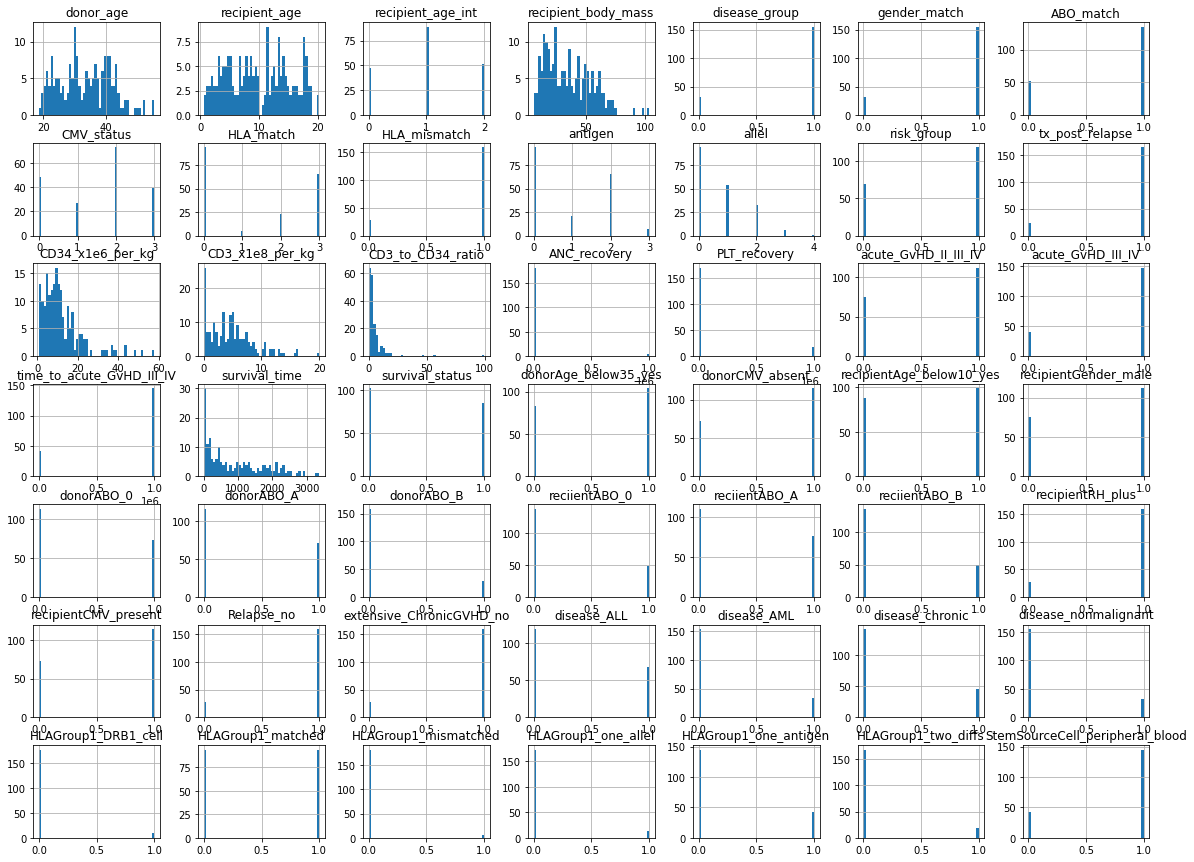

In [126]:
df.hist(bins =50, figsize = (20,15))
plt.show()

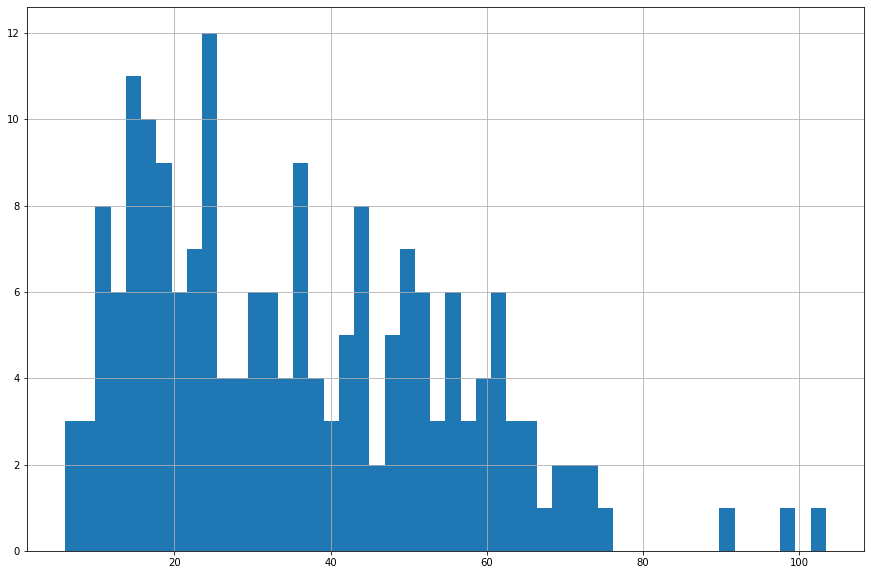

In [127]:
df['recipient_body_mass'].hist(bins =50, figsize = (15,10))
plt.show()

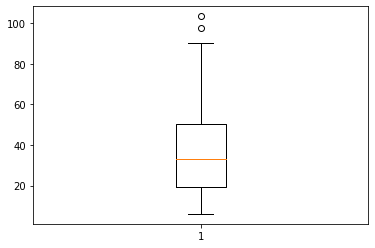

In [128]:
plt.boxplot(df.recipient_body_mass)
plt.show()

In [129]:
import numpy as np
print(df['recipient_body_mass'].quantile(0.10))
print(df['recipient_body_mass'].quantile(0.90))

13.0
62.0


In [130]:
print(df.recipient_body_mass.skew())
df.recipient_body_mass = np.where(df['recipient_body_mass']<13.0, 13.0, df['recipient_body_mass'])
df.recipient_body_mass = np.where(df['recipient_body_mass']>62.0, 62.0, df['recipient_body_mass'])
print(df.recipient_body_mass.skew())

0.6631319670572736
0.2527541801847508


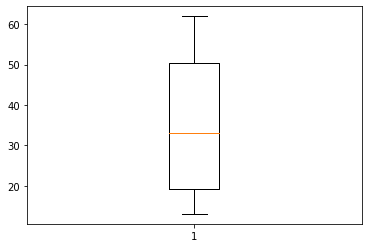

In [131]:
plt.boxplot(df.recipient_body_mass)
plt.show()

In [132]:
from sklearn.preprocessing import StandardScaler

In [133]:
scaler = StandardScaler()

In [134]:
scaler.fit(df)

StandardScaler()

In [135]:
df_cpy = df

In [136]:
df_cpy.head()

,donor_age,recipient_age,recipient_age_int,recipient_body_mass,disease_group,gender_match,ABO_match,CMV_status,HLA_match,HLA_mismatch,...,disease_AML,disease_chronic,disease_nonmalignant,HLAGroup1_DRB1_cell,HLAGroup1_matched,HLAGroup1_mismatched,HLAGroup1_one_allel,HLAGroup1_one_antigen,HLAGroup1_two_diffs,StemSourceCell_peripheral_blood
0,22.830137,9.6,2,35.0,1,1,0,3,0,1,...,0,0,0,0,1,0,0,0,0,1
1,23.342466,4.0,0,20.6,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,26.394521,6.6,2,23.4,1,1,0,2,0,1,...,0,0,0,0,1,0,0,0,0,0
3,39.684932,18.1,1,50.0,1,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,0
4,33.358904,1.3,0,13.0,1,1,1,0,3,1,...,0,1,0,0,0,0,0,1,0,1


In [137]:
df = scaler.transform(df)

In [138]:
df

array([[-1.28998124, -0.06265803,  1.35240547, ..., -0.53819622,
        -0.33629635,  0.53819622],
       [-1.22787834, -1.12097231, -1.41152702, ..., -0.53819622,
        -0.33629635, -1.85805838],
       [-0.85791788, -0.62961211,  1.35240547, ..., -0.53819622,
        -0.33629635, -1.85805838],
       ...,
       [-0.74234683,  0.08852973, -0.02956078, ..., -0.53819622,
        -0.33629635,  0.53819622],
       [-0.68987485, -0.36503354,  1.35240547, ...,  1.85805838,
        -0.33629635,  0.53819622],
       [ 2.67663232, -0.0815565 ,  1.35240547, ..., -0.53819622,
        -0.33629635,  0.53819622]])

In [139]:
normalized = df

In [140]:
df = df_cpy

In [141]:
df.head()

,donor_age,recipient_age,recipient_age_int,recipient_body_mass,disease_group,gender_match,ABO_match,CMV_status,HLA_match,HLA_mismatch,...,disease_AML,disease_chronic,disease_nonmalignant,HLAGroup1_DRB1_cell,HLAGroup1_matched,HLAGroup1_mismatched,HLAGroup1_one_allel,HLAGroup1_one_antigen,HLAGroup1_two_diffs,StemSourceCell_peripheral_blood
0,22.830137,9.6,2,35.0,1,1,0,3,0,1,...,0,0,0,0,1,0,0,0,0,1
1,23.342466,4.0,0,20.6,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,26.394521,6.6,2,23.4,1,1,0,2,0,1,...,0,0,0,0,1,0,0,0,0,0
3,39.684932,18.1,1,50.0,1,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,0
4,33.358904,1.3,0,13.0,1,1,1,0,3,1,...,0,1,0,0,0,0,0,1,0,1


In [142]:
df.columns

Index(['donor_age', 'recipient_age', 'recipient_age_int',
       'recipient_body_mass', 'disease_group', 'gender_match', 'ABO_match',
       'CMV_status', 'HLA_match', 'HLA_mismatch', 'antigen', 'allel',
       'risk_group', 'tx_post_relapse', 'CD34_x1e6_per_kg', 'CD3_x1e8_per_kg',
       'CD3_to_CD34_ratio', 'ANC_recovery', 'PLT_recovery',
       'acute_GvHD_II_III_IV', 'acute_GvHD_III_IV',
       'time_to_acute_GvHD_III_IV', 'survival_time', 'survival_status',
       'donorAge_below35_yes', 'donorCMV_absent', 'recipientAge_below10_yes',
       'recipientGender_male', 'donorABO_0', 'donorABO_A', 'donorABO_B',
       'reciientABO_0', 'reciientABO_A', 'reciientABO_B', 'recipientRH_plus',
       'recipientCMV_present', 'Relapse_no', 'extensive_ChronicGVHD_no',
       'disease_ALL', 'disease_AML', 'disease_chronic', 'disease_nonmalignant',
       'HLAGroup1_DRB1_cell', 'HLAGroup1_matched', 'HLAGroup1_mismatched',
       'HLAGroup1_one_allel', 'HLAGroup1_one_antigen', 'HLAGroup1_two_diffs'

In [143]:
df = pd.DataFrame(normalized, columns = ['donor_age', 'recipient_age', 'recipient_age_int',
       'recipient_body_mass', 'disease_group', 'gender_match', 'ABO_match',
       'CMV_status', 'HLA_match', 'HLA_mismatch', 'antigen', 'allel',
       'risk_group', 'tx_post_relapse', 'CD34_x1e6_per_kg', 'CD3_x1e8_per_kg',
       'CD3_to_CD34_ratio', 'ANC_recovery', 'PLT_recovery',
       'acute_GvHD_II_III_IV', 'acute_GvHD_III_IV',
       'time_to_acute_GvHD_III_IV', 'survival_time', 'survival_status',
       'donorAge_below35_yes', 'donorCMV_absent', 'recipientAge_below10_yes',
       'recipientGender_male', 'donorABO_0', 'donorABO_A', 'donorABO_B',
       'reciientABO_0', 'reciientABO_A', 'reciientABO_B', 'recipientRH_plus',
       'recipientCMV_present', 'Relapse_no', 'extensive_ChronicGVHD_no',
       'disease_ALL', 'disease_AML', 'disease_chronic', 'disease_nonmalignant',
       'HLAGroup1_DRB1_cell', 'HLAGroup1_matched', 'HLAGroup1_mismatched',
       'HLAGroup1_one_allel', 'HLAGroup1_one_antigen', 'HLAGroup1_two_diffs',
       'StemSourceCell_peripheral_blood'])

In [144]:
df.head()

,donor_age,recipient_age,recipient_age_int,recipient_body_mass,disease_group,gender_match,ABO_match,CMV_status,HLA_match,HLA_mismatch,...,disease_AML,disease_chronic,disease_nonmalignant,HLAGroup1_DRB1_cell,HLAGroup1_matched,HLAGroup1_mismatched,HLAGroup1_one_allel,HLAGroup1_one_antigen,HLAGroup1_two_diffs,StemSourceCell_peripheral_blood
0,-1.289981,-0.062658,1.352405,-0.003128,0.454369,0.454369,-1.611258,1.335283,-0.950253,0.419643,...,-0.462910,-0.562940,-0.454369,-0.22486,0.994667,-0.165748,-0.284473,-0.538196,-0.336296,0.538196
1,-1.227878,-1.120972,-1.411527,-0.853630,0.454369,0.454369,-1.611258,-1.428901,-0.950253,0.419643,...,-0.462910,-0.562940,-0.454369,-0.22486,0.994667,-0.165748,-0.284473,-0.538196,-0.336296,-1.858058
2,-0.857918,-0.629612,1.352405,-0.688255,0.454369,0.454369,-1.611258,0.413889,-0.950253,0.419643,...,-0.462910,-0.562940,-0.454369,-0.22486,0.994667,-0.165748,-0.284473,-0.538196,-0.336296,-1.858058
3,0.753104,1.543712,-0.029561,0.882813,0.454369,0.454369,0.620633,-0.507506,-0.950253,0.419643,...,2.160247,-0.562940,-0.454369,-0.22486,0.994667,-0.165748,-0.284473,-0.538196,-0.336296,-1.858058
4,-0.013717,-1.631231,-1.411527,-1.302507,0.454369,0.454369,0.620633,-1.428901,1.216788,0.419643,...,-0.462910,1.776388,-0.454369,-0.22486,-1.005362,-0.165748,-0.284473,1.858058,-0.336296,0.538196


In [145]:
corr_matrix = df.corr()

In [146]:
corr_matrix

,donor_age,recipient_age,recipient_age_int,recipient_body_mass,disease_group,gender_match,ABO_match,CMV_status,HLA_match,HLA_mismatch,...,disease_AML,disease_chronic,disease_nonmalignant,HLAGroup1_DRB1_cell,HLAGroup1_matched,HLAGroup1_mismatched,HLAGroup1_one_allel,HLAGroup1_one_antigen,HLAGroup1_two_diffs,StemSourceCell_peripheral_blood
donor_age,1.000000,0.094282,-0.000774,0.084245,0.035436,-0.091562,-0.056032,-0.007307,0.121029,-0.123384,...,-1.748855e-02,0.013819,-0.035436,-0.147815,-0.131971,-0.084434,-0.074420,0.175366,0.167534,0.022860
recipient_age,0.094282,1.000000,0.280547,0.913343,0.190279,-0.045860,-0.027652,0.000047,-0.091735,-0.035735,...,2.408665e-01,-0.026525,-0.190279,-0.069805,0.084153,-0.074286,0.010592,-0.102256,0.074930,-0.090510
recipient_age_int,-0.000774,0.280547,1.000000,0.200254,0.052677,0.052677,0.084323,-0.049049,-0.012075,0.033117,...,-7.184089e-02,-0.051217,-0.052677,-0.110230,0.029403,-0.096523,-0.064571,0.090343,0.014519,-0.001799
recipient_body_mass,0.084245,0.913343,0.200254,1.000000,0.175941,-0.028770,-0.064606,-0.017971,-0.101052,0.001667,...,1.814037e-01,-0.038778,-0.175941,-0.068435,0.103739,-0.093715,0.019152,-0.099844,0.057491,-0.094965
disease_group,0.035436,0.190279,0.052677,0.175941,1.000000,0.019758,-0.123543,-0.122644,0.154837,-0.031495,...,2.103322e-01,0.255783,-1.000000,-0.096848,-0.139563,-0.100728,0.075303,0.142466,0.105806,-0.074417
gender_match,-0.091562,-0.045860,0.052677,-0.028770,0.019758,1.000000,-0.155234,0.178264,-0.070809,0.008299,...,-1.314576e-02,0.056485,-0.019758,-0.096848,0.059227,0.075311,0.021350,-0.027656,0.011812,0.061681
ABO_match,-0.056032,-0.027652,0.084323,-0.064606,-0.123543,-0.155234,1.000000,0.040048,0.132825,-0.026295,...,-2.578308e-02,0.070174,0.123543,0.028030,-0.139906,0.102869,0.085851,0.076623,0.011196,-0.105223
CMV_status,-0.007307,0.000047,-0.049049,-0.017971,-0.122644,0.178264,0.040048,1.000000,-0.030244,0.102498,...,-5.398061e-02,-0.078220,0.122644,0.070046,0.051486,0.007513,0.005406,-0.013385,-0.056513,0.072420
HLA_match,0.121029,-0.091735,-0.012075,-0.101052,0.154837,-0.070809,0.132825,-0.030244,1.000000,-0.153359,...,-1.257657e-01,0.178940,-0.154837,0.273606,-0.955349,-0.037775,0.346143,0.654871,0.166279,0.030095
HLA_mismatch,-0.123384,-0.035735,0.033117,0.001667,-0.031495,0.008299,-0.026295,0.102498,-0.153359,1.000000,...,-1.202544e-01,-0.009187,0.031495,0.094361,0.421894,-0.394974,0.119377,0.225851,-0.801386,-0.082197


In [148]:
df.disease_nonmalignant.value_counts()

-0.454369    155
 2.200852     32
Name: disease_nonmalignant, dtype: int64

In [149]:
from sklearn.model_selection import train_test_split

In [150]:
df.columns = ['donor_age', 'recipient_age', 'recipient_age_int',
       'recipient_body_mass', 'disease_group', 'gender_match', 'ABO_match',
       'CMV_status', 'HLA_match', 'HLA_mismatch', 'antigen', 'allel',
       'risk_group', 'tx_post_relapse', 'CD34_x1e6_per_kg', 'CD3_x1e8_per_kg',
       'CD3_to_CD34_ratio', 'ANC_recovery', 'PLT_recovery',
       'acute_GvHD_II_III_IV', 'acute_GvHD_III_IV',
       'time_to_acute_GvHD_III_IV', 'survival_time', 'survival_status',
       'donorAge_below35_yes', 'donorCMV_absent', 'recipientAge_below10_yes',
       'recipientGender_male', 'donorABO_0', 'donorABO_A', 'donorABO_B',
       'reciientABO_0', 'reciientABO_A', 'reciientABO_B', 'recipientRH_plus',
       'recipientCMV_present', 'Relapse_no', 'extensive_ChronicGVHD_no',
       'disease_ALL', 'disease_AML', 'disease_chronic', 'disease_nonmalignant',
       'HLAGroup1_DRB1_cell', 'HLAGroup1_matched', 'HLAGroup1_mismatched',
       'HLAGroup1_one_allel', 'HLAGroup1_one_antigen', 'HLAGroup1_two_diffs',
       'StemSourceCell_peripheral_blood']

In [151]:
target_column = df.pop('survival_status')
df.insert(0, 'survival_status', target_column)

In [152]:
df.head()

,survival_status,donor_age,recipient_age,recipient_age_int,recipient_body_mass,disease_group,gender_match,ABO_match,CMV_status,HLA_match,...,disease_AML,disease_chronic,disease_nonmalignant,HLAGroup1_DRB1_cell,HLAGroup1_matched,HLAGroup1_mismatched,HLAGroup1_one_allel,HLAGroup1_one_antigen,HLAGroup1_two_diffs,StemSourceCell_peripheral_blood
0,-0.912871,-1.289981,-0.062658,1.352405,-0.003128,0.454369,0.454369,-1.611258,1.335283,-0.950253,...,-0.462910,-0.562940,-0.454369,-0.22486,0.994667,-0.165748,-0.284473,-0.538196,-0.336296,0.538196
1,1.095445,-1.227878,-1.120972,-1.411527,-0.853630,0.454369,0.454369,-1.611258,-1.428901,-0.950253,...,-0.462910,-0.562940,-0.454369,-0.22486,0.994667,-0.165748,-0.284473,-0.538196,-0.336296,-1.858058
2,1.095445,-0.857918,-0.629612,1.352405,-0.688255,0.454369,0.454369,-1.611258,0.413889,-0.950253,...,-0.462910,-0.562940,-0.454369,-0.22486,0.994667,-0.165748,-0.284473,-0.538196,-0.336296,-1.858058
3,1.095445,0.753104,1.543712,-0.029561,0.882813,0.454369,0.454369,0.620633,-0.507506,-0.950253,...,2.160247,-0.562940,-0.454369,-0.22486,0.994667,-0.165748,-0.284473,-0.538196,-0.336296,-1.858058
4,-0.912871,-0.013717,-1.631231,-1.411527,-1.302507,0.454369,0.454369,0.620633,-1.428901,1.216788,...,-0.462910,1.776388,-0.454369,-0.22486,-1.005362,-0.165748,-0.284473,1.858058,-0.336296,0.538196


In [153]:
X = df.iloc[:,1:]

In [155]:
from sklearn.linear_model import LogisticRegression

In [156]:
logisticRegression = LogisticRegression()

In [157]:
target_column = df_cpy.pop('survival_status')
df_cpy.insert(0, 'survival_status', target_column)

In [158]:
cpy2 = df_cpy

In [159]:
y = df_cpy.iloc[:,0]

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size = 0.2, random_state=21)

In [161]:
print(len(X_train))

149


In [162]:
logisticRegression.fit(X_train, y_train)

LogisticRegression()

In [163]:
y_pred = logisticRegression.predict(X_test)

In [164]:
logisticRegression.score(X_test, y_test)

0.9473684210526315

In [165]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [166]:
cm = metrics.confusion_matrix(y_test, y_pred)

In [167]:
print(cm)

[[17  2]
 [ 0 19]]


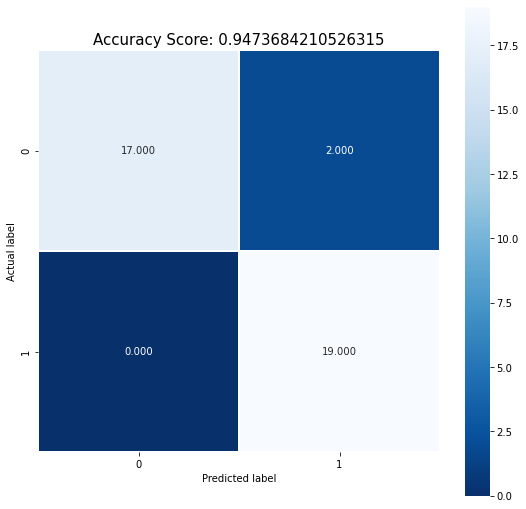

In [168]:
score = logisticRegression.score(X_test, y_test)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [169]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.89      0.94        19
           1       0.90      1.00      0.95        19

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38

